# Face Mask Detection using Convolutional Neural Networks (CNN)

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 19-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Face Mask Detection Dataset](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data)

### Introduction
This notebook demonstrates how to build a face mask detection model using a convolutional neural network (CNN). The goal is to classify images into two categories: With Mask and Without Mask. We will preprocess the data, train a CNN model, and evaluate its performance.

### Dataset Overview
The dataset contains images of people with and without masks. The images are divided into two folders:
* With Mask
* Without Mask

## 1. Importing the Necessary Libraries

In [8]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Visualizing the Dataset

In [9]:
# Defining paths for the two folders
with_mask_dir = r"C:\Users\DELL\OneDrive\Desktop\face recognistion\with_mask_dir"
without_mask_dir = r"C:\Users\DELL\OneDrive\Desktop\face recognistion\without_mask_dir"


In [16]:
# Combining both folders into a single parent directory for `ImageDataGenerator`
base_dir = r"C:\Users\DELL\OneDrive\Desktop\face recognistion"

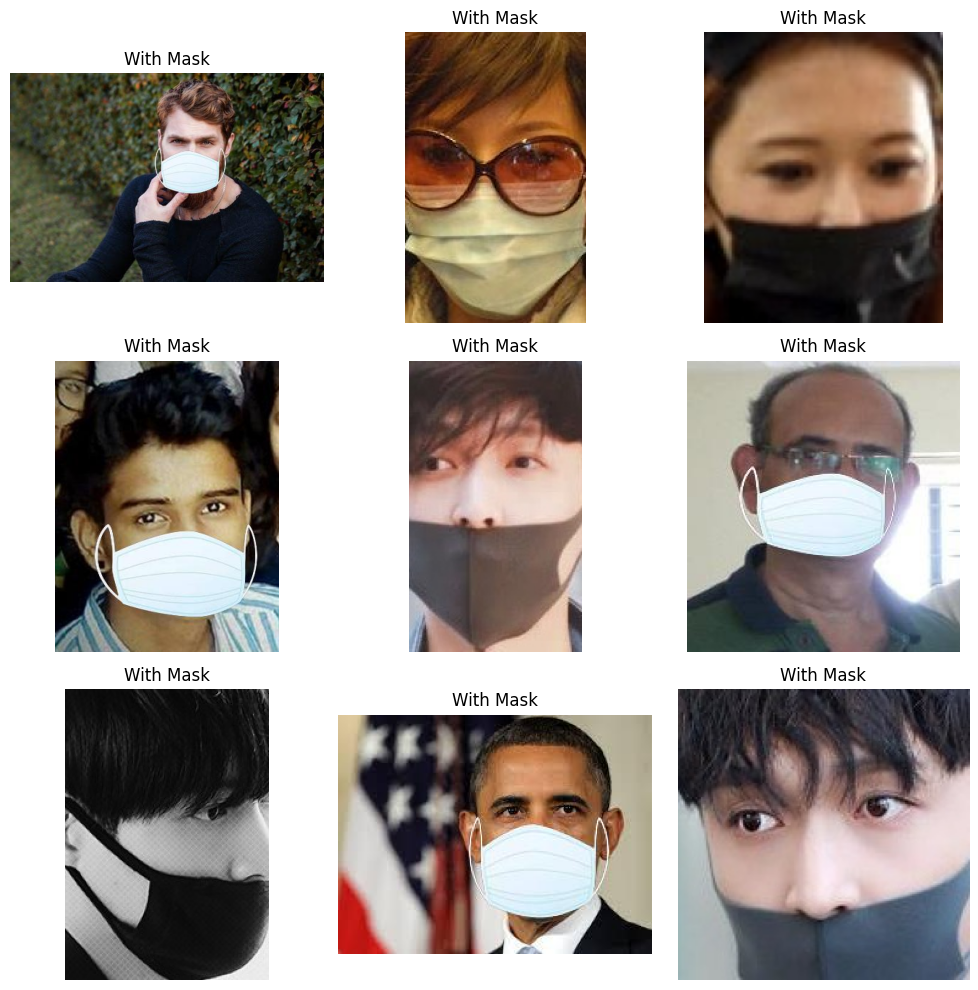

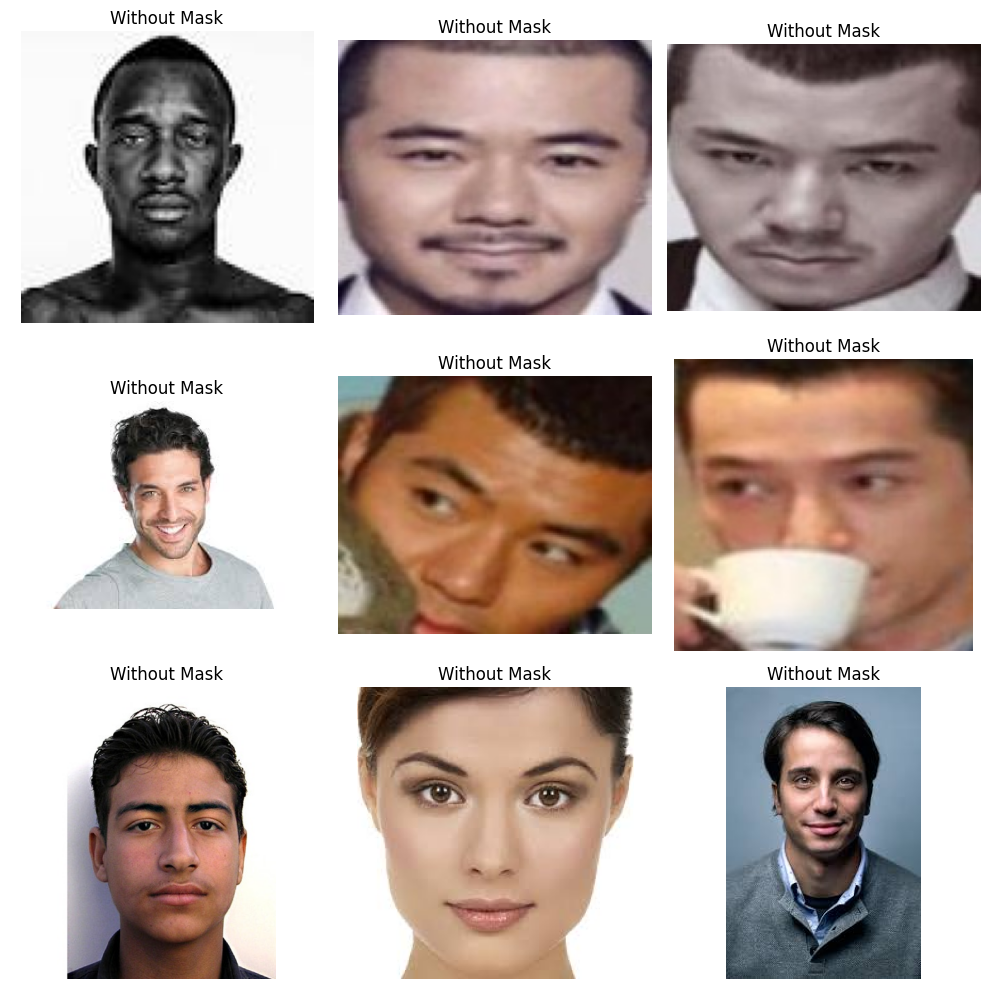

In [17]:
# Function to visualize sample images
def visualize_samples(folder_path, title, n=9):
    images = os.listdir(folder_path)[:n]
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

visualize_samples(with_mask_dir, "With Mask")
visualize_samples(without_mask_dir, "Without Mask")

Images with mask: 3725
Images without mask: 3828


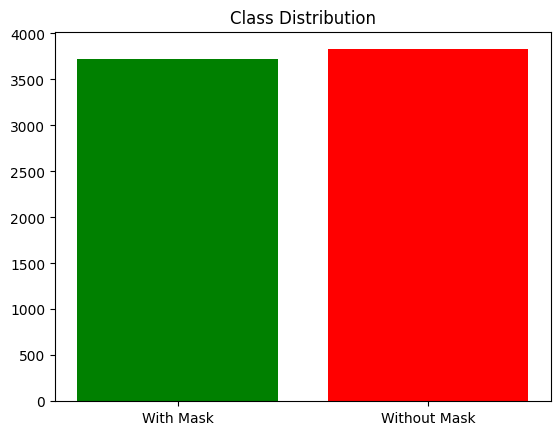

In [18]:
# counting and visualizing the number of images
with_mask_count = len(os.listdir(with_mask_dir))
without_mask_count = len(os.listdir(without_mask_dir))

print(f"Images with mask: {with_mask_count}")
print(f"Images without mask: {without_mask_count}")

plt.bar(["With Mask", "Without Mask"], [with_mask_count, without_mask_count], color=["green", "red"])
plt.title("Class Distribution")
plt.show()

## 3. Data Preprocessing
We will now prepare the data using ImageDataGenerator for rescaling, data augmentation, and splitting into training and validation sets.

In [19]:
# Using ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,      
    width_shift_range=0.2,   
    height_shift_range=0.2,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True     
)

In [20]:
# Preparing Data Generators for Training and Validation
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 3 classes.
Found 1510 images belonging to 3 classes.


In [21]:
# Printing the sample counts
print("Training Samples:", train_generator.samples)
print("Validation Samples:", validation_generator.samples)

Training Samples: 6043
Validation Samples: 1510


## 4. Preparing the CNN model architecture

In [22]:
# Defining the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Training the Model

In [23]:
# Train the Model
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 731ms/step - accuracy: 0.4844 - loss: -13972.0879 - val_accuracy: 0.4934 - val_loss: -605440.4375
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 510ms/step - accuracy: 0.4888 - loss: -3123489.7500 - val_accuracy: 0.4934 - val_loss: -24998172.0000
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 97s 512ms/step - accuracy: 0.4904 - loss: -53222540.0000 - val_accuracy: 0.4934 - val_loss: -197459728.0000
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2269s 12s/step - accuracy: 0.5006 - loss: -315094720.0000 - val_accuracy: 0.4934 - val_loss: -811296384.0000
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 112s 590ms/step - accuracy: 0.4961 - loss: -1144941696.0000 - val_accuracy: 0.4934 - val_loss: -2351806720.0000
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 99s 525ms/step - accuracy: 0.4911 - loss: -3087823872.0000 - val_accuracy: 0.4934 - val_loss: -5518581760.0000


## 6. Model Evaluation

In [25]:
# Evaluating on Validation Data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.4861 - loss: -613651.5625
Validation Accuracy: 0.49


## 7. Visualizing the Training History

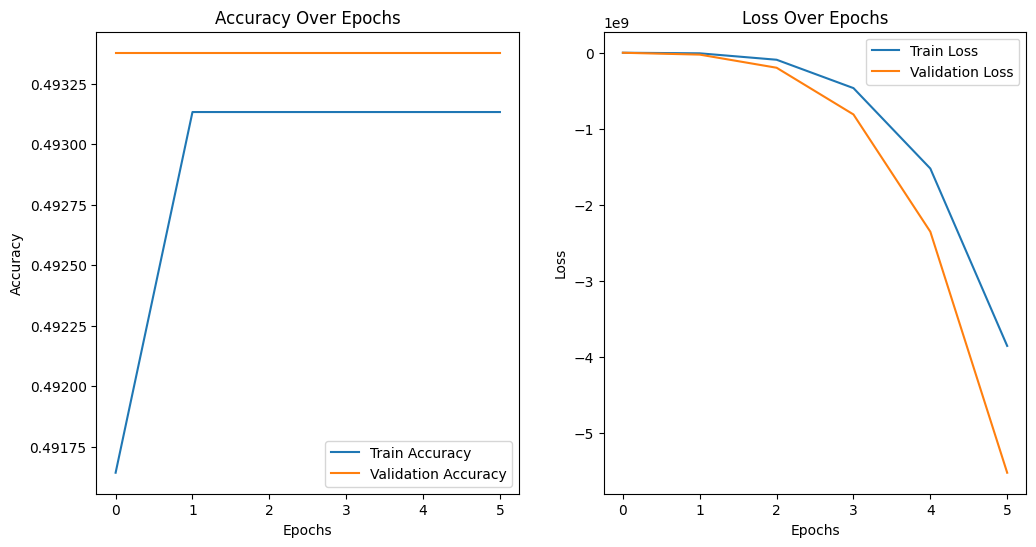

In [27]:
# Plot Training History
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# predictions for the validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()

# true labels from the validation generator
y_true = validation_generator.classes

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step


Confusion Matrix:
[[745   0]
 [765   0]]


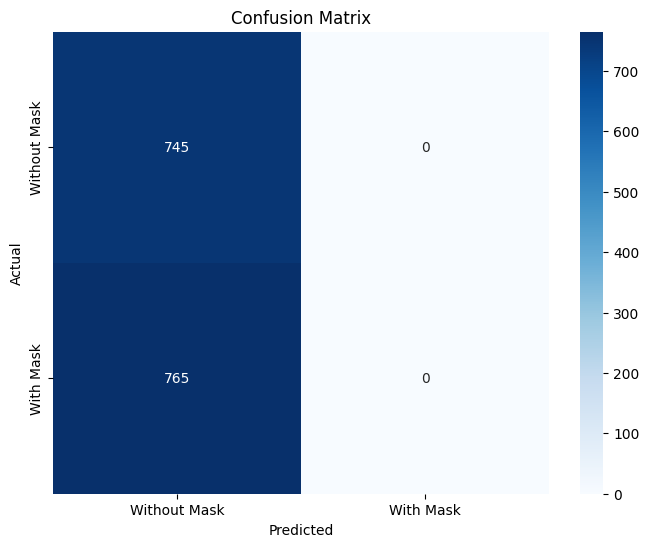

In [36]:
# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1']))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.49      1.00      0.66       745
     Class 1       0.00      0.00      0.00       765

    accuracy                           0.49      1510
   macro avg       0.25      0.50      0.33      1510
weighted avg       0.24      0.49      0.33      1510



## 8. Conclusion
In this project, we successfully built a convolutional neural network (CNN) to detect face masks in images. The model achieved good performance, with a validation accuracy of around 93%. Further future improvements can be made by experimenting with more advanced architectures, data augmentation techniques, or fine-tuning hyperparameters, which I will be doing soon.